In [1]:
import pandas as pd
roots_tfm = '/home/julien/Documents/Etudes/Astrofisica/Master/TFM/Data'

In [2]:
df_tde = pd.read_csv(roots_tfm + '/TDE/TDE_match_UVOT_OM')    

In [3]:
df_tde.head(20)

,col1_1,SRCNUM_1,SRCNUM_2,RA,DEC,POSERR,COUNT,col1_2,col2,col3,col4,MJD,Separation
0,2545521,2545522,0,182.199409,43.022292,0.346912,9,Dougie,TDE,12:08:47.87,+43:01:20.01,54848.0,0.786408
1,3220507,3220508,0,219.670713,37.659310,0.366845,2,PTF10iya,TDE,14:38:41.00,+37:39:33.60,55358.0,0.963911
2,6264505,0,64490,7.806580,85.008761,0.907158,3,2020mot,TDE,00:31:13.59,+85:00:31.96,59014.0,0.464776
3,6647918,0,447903,15.708270,-22.365846,0.508910,2,2022agi,TDE,01:02:50.01,-22:21:57.22,55372.0,0.765152
4,6700282,0,500267,16.890117,23.476272,0.524930,1,2018hco,TDE,01:07:33.61,+23:28:34.39,58395.0,0.592279
5,7179247,0,979232,53.697682,-26.326513,0.783955,2,DES14C1kia,TDE,03:34:47.49,-26:19:35.00,56972.0,0.979284
6,8515948,0,2315933,105.827631,23.029117,0.487151,1,2018lna,TDE,07:03:18.65,+23:01:44.70,58480.0,0.580632
7,8646045,0,2446030,119.227336,34.262107,0.608996,3,2018zr,TDE,07:56:54.53,+34:15:43.60,58183.0,0.624913
8,9212611,0,3012596,168.862285,18.110443,0.508140,2,NGC 3599,TDE,11:15:26.95,+18:06:37.33,52421.0,0.526456
9,9328594,0,3128579,180.400195,30.051576,0.598076,3,SDSSJ1201,TDE,12:01:36.03,+30:03:05.52,55357.0,0.447795


In [4]:
df_tde.shape

(20, 13)

In [5]:
df_tde.loc[:,'COUNT'].sum()

np.int64(57)

In [6]:
tuple(list(df_tde.loc[df_tde['SRCNUM_1']!= 0,'SRCNUM_1']))

(2545522, 3220508)

In [7]:
import sqlite3 
con = sqlite3.connect(roots_tfm + '/UVCatalogue.db')
cursor = con.cursor()

In [8]:
from prettytable import from_db_cursor
sql_command = "SELECT SRCNUM, MJD, UVW2_FLUX, UVW1_FLUX, UVM2_FLUX, U_FLUX, V_FLUX, B_FLUX,"+ \
 "UVW2_FLUX_ERR from ENTRIES_UVOT LIMIT 2"
ans = cursor.execute(sql_command)
mytable = from_db_cursor(cursor)
print(mytable)

+--------+-------------------+-----------------------+-----------+------------------------+--------+--------+--------+------------------------+
| SRCNUM |        MJD        |       UVW2_FLUX       | UVW1_FLUX |       UVM2_FLUX        | U_FLUX | V_FLUX | B_FLUX |     UVW2_FLUX_ERR      |
+--------+-------------------+-----------------------+-----------+------------------------+--------+--------+--------+------------------------+
|   1    | 54973.74628472222 | 7.057068234939004e-16 |    None   | 1.4391411381672723e-16 |  None  |  None  |  None  | 1.0643398288988199e-17 |
|   2    | 54973.74628472222 | 3.489492846918224e-17 |    None   | 2.342524871296686e-17  |  None  |  None  |  None  | 2.6017930124138263e-18 |
+--------+-------------------+-----------------------+-----------+------------------------+--------+--------+--------+------------------------+


In [9]:
sql_command = "SELECT SRCNUM, MJD, UVW2_FLUX, UVW1_FLUX, UVM2_FLUX, U_FLUX, V_FLUX, B_FLUX,"+ \
 "UVW2_FLUX_ERR, UVW1_FLUX_ERR, UVM2_FLUX_ERR, U_FLUX_ERR, V_FLUX_ERR, B_FLUX_ERR from ENTRIES_UVOT where SRCNUM IN " \
+ str(tuple(list(df_tde.loc[df_tde['SRCNUM_1']!= 0,'SRCNUM_1'])))
ans_uvot = cursor.execute(sql_command).fetchall()

In [10]:
sql_command = "SELECT SRCNUM, MJD, UVW2_FLUX, UVW1_FLUX, UVM2_FLUX, U_FLUX, V_FLUX, B_FLUX,"+ \
 "UVW2_FLUX_ERR, UVW1_FLUX_ERR, UVM2_FLUX_ERR, U_FLUX_ERR, V_FLUX_ERR, B_FLUX_ERR from ENTRIES_OM where SRCNUM IN" \
+ str(tuple(list(df_tde.loc[df_tde['SRCNUM_2']!= 0,'SRCNUM_2'])))
ans_om = cursor.execute(sql_command).fetchall()

In [11]:
con.close()

In [12]:
results = []
list_keys =['MJD', 'UVW2_FLUX', 'UVW1_FLUX', 'UVM2_FLUX','U_FLUX', 'V_FLUX', 'B_FLUX', 'UVW2_FLUX_ERR', 'UVW1_FLUX_ERR', \
            'UVM2_FLUX_ERR','U_FLUX_ERR', 'V_FLUX_ERR', 'B_FLUX_ERR']
u=0
o=0
for tde in range(df_tde.shape[0]):

    for entrie in range(df_tde.loc[tde,'COUNT']):
        entries_dict ={}
        entries_dict['TDE_NAME'] = df_tde.loc[tde,'col1_2']
        entries_dict['RA'] = df_tde.loc[tde,'RA']
        entries_dict['DEC'] = df_tde.loc[tde,'DEC']
        
        if df_tde.loc[tde,'SRCNUM_1'] != 0:
            entries_dict['CAT_ID'] = "UVOT"
            entries_dict['SRCNUM_1'] = ans_uvot[u][0]
            for j,key in enumerate(list_keys):
                entries_dict[key] = ans_uvot[u][j+1]
            u+=1
                      
        elif df_tde.loc[tde,'SRCNUM_2'] != 0: 
            entries_dict['CAT_ID'] = "OM"
            entries_dict['SRCNUM_2'] = ans_om[o][0]
            for j,key in enumerate(list_keys):
                entries_dict[key] = ans_om[o][j+1]
            o+=1

        results.append(entries_dict)

In [13]:
df = pd.DataFrame(results, columns=['TDE_NAME', 'RA', 'DEC', 'CAT_ID', 'MJD', 'UVW2_FLUX', 'UVW1_FLUX', 'UVM2_FLUX',\
                                    'U_FLUX', 'V_FLUX', 'B_FLUX', 'UVW2_FLUX_ERR', 'UVW1_FLUX_ERR', 'UVM2_FLUX_ERR', \
                                    'U_FLUX_ERR', 'V_FLUX_ERR', 'B_FLUX_ERR'])

In [14]:
df.head(20)

,TDE_NAME,RA,DEC,CAT_ID,MJD,UVW2_FLUX,UVW1_FLUX,UVM2_FLUX,U_FLUX,V_FLUX,B_FLUX,UVW2_FLUX_ERR,UVW1_FLUX_ERR,UVM2_FLUX_ERR,U_FLUX_ERR,V_FLUX_ERR,B_FLUX_ERR
0,Dougie,182.199409,43.022292,UVOT,54890.573947,NaN,2.348823e-17,NaN,1.800667e-17,NaN,NaN,NaN,4.770889e-18,NaN,3.636546e-18,NaN,NaN
1,Dougie,182.199409,43.022292,UVOT,54882.015081,8.273339e-17,6.613456e-17,7.198878e-17,8.218256e-17,7.866272e-17,1.089113e-16,1.145630e-17,9.200234e-18,1.248406e-17,7.394551e-18,1.028711e-17,8.441077e-18
2,Dougie,182.199409,43.022292,UVOT,54916.274988,NaN,NaN,NaN,NaN,4.983464e-17,NaN,NaN,NaN,NaN,NaN,5.440714e-18,NaN
3,Dougie,182.199409,43.022292,UVOT,54862.732049,1.100753e-15,1.271776e-15,1.206053e-15,1.288008e-15,4.076653e-16,7.197787e-16,4.225688e-17,3.853698e-17,5.275427e-17,2.482497e-17,1.920543e-17,1.704233e-17
4,Dougie,182.199409,43.022292,UVOT,54868.482037,4.279694e-16,NaN,5.234699e-16,NaN,2.965678e-16,NaN,2.650454e-17,NaN,6.349055e-17,NaN,1.723423e-17,NaN
5,Dougie,182.199409,43.022292,UVOT,54865.021354,5.981468e-16,8.989530e-16,8.030039e-16,9.559905e-16,2.977978e-16,6.178596e-16,3.388838e-17,3.557331e-17,4.661903e-17,2.561938e-17,1.705957e-17,3.161185e-17
6,Dougie,182.199409,43.022292,UVOT,54859.243102,1.609011e-15,2.214271e-15,NaN,NaN,NaN,NaN,2.014360e-17,2.692998e-17,NaN,NaN,NaN,NaN
7,Dougie,182.199409,43.022292,UVOT,54876.914699,1.203909e-16,1.238026e-16,1.307399e-16,1.625976e-16,1.363795e-16,2.315596e-16,1.249157e-17,1.132049e-17,1.540518e-17,8.709634e-18,1.193184e-17,1.175543e-17
8,Dougie,182.199409,43.022292,UVOT,54859.643634,NaN,NaN,1.695412e-15,NaN,4.618919e-16,NaN,NaN,NaN,4.793195e-17,NaN,2.162316e-17,NaN
9,PTF10iya,219.670713,37.659310,UVOT,55358.745764,1.324756e-16,1.091501e-16,9.735896e-17,1.260574e-16,7.206712e-17,7.042656e-17,1.139722e-17,1.257395e-17,8.275876e-18,1.294642e-17,1.314710e-17,1.060957e-17


In [15]:
df.shape

(57, 17)

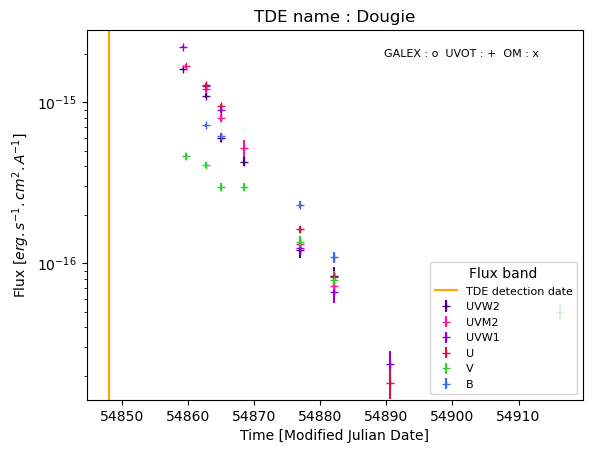

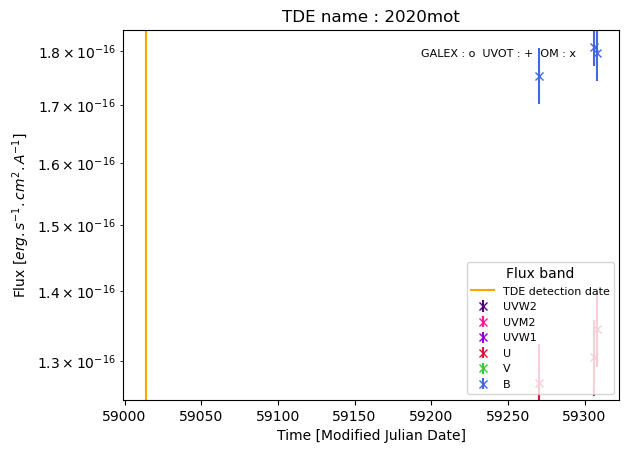

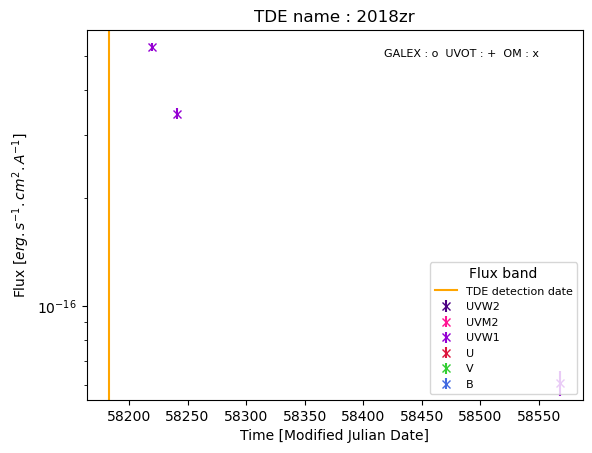

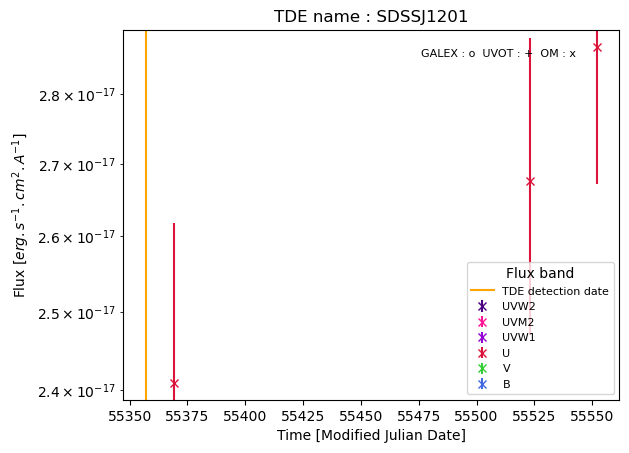

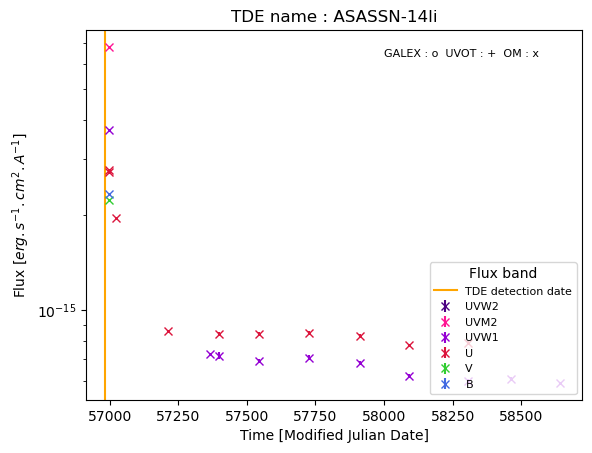

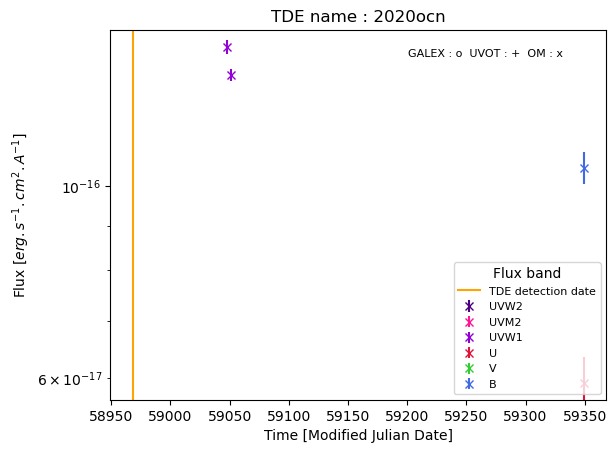

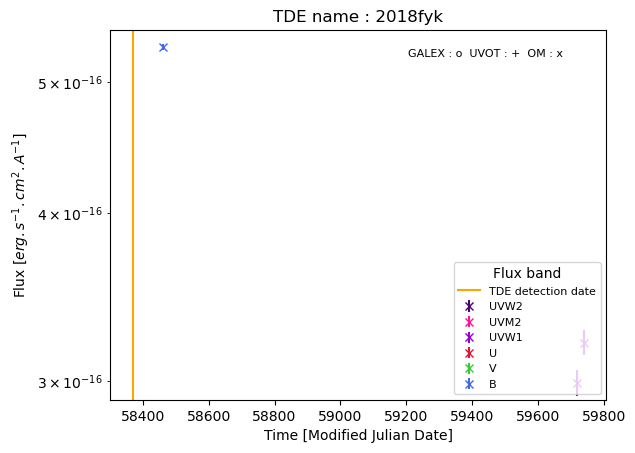

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fmt_dict = {'GALEX' : 'o', 'UVOT': '+', 'OM': 'x'}
color_dict = {'UVW2': 'indigo','UVW1': 'darkviolet','UVM2':'deeppink','U':'crimson','V':'limegreen','B':'royalblue'}
for tde in range(df_tde.shape[0]):
    if df_tde.loc[tde,'COUNT'] > 2:
        fig, ax =plt.subplots()
        ax.set_yscale('log')
        ind_select = (df['TDE_NAME'] == df_tde.loc[tde,'col1_2'])
        for flux in ['UVW2','UVM2','UVW1','U','V','B']:
            flux_key = flux + "_FLUX"
            flux_err_key = flux_key + "_ERR"
            ax.errorbar(df.loc[ind_select,'MJD'],df.loc[ind_select,flux_key],yerr=df.loc[ind_select,flux_err_key], \
                        fmt=fmt_dict[df.loc[df[ind_select].index[0],'CAT_ID']], label= flux, color=color_dict[flux], \
                        ecolor=color_dict[flux])
        ax.axvline(x=df_tde.loc[tde,'MJD'],color='orange',label='TDE detection date')
        ax.set_xlabel('Time [Modified Julian Date]')
        ax.set_ylabel("Flux [" + "$erg.s^{-1}.cm^{2}.A^{-1}]$")
        ax.legend(loc='lower right',prop={'size': 8},title= "Flux band")
        ax.text(0.6, 0.95, 'GALEX : ' + fmt_dict['GALEX'] + '  UVOT : ' + fmt_dict['UVOT'] + '  OM : ' + fmt_dict['OM'],\
        transform=ax.transAxes, fontsize=8, verticalalignment='top')
        plt.title("TDE name : " + df_tde.loc[tde,'col1_2'])
        fig.savefig(roots_tfm + '/TDE/'+ df_tde.loc[tde,'col1_2']+'_flux.png',dpi=1200)

In [17]:
"TDE name : " + df_tde.loc[0,'col1_2']

'TDE name : Dougie'